# ***SUPERCONDUCTIVITY DATA***

---







# **1.SVM METHOD**

*A:Data Loading and Feature Selection*

In [ ]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)
data=data.fillna(0)

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)


      number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                      4         88.944468             57.862692   
1                      5         92.729214             58.518416   
2                      4         88.944468             57.885242   
3                      4         88.944468             57.873967   
4                      4         88.944468             57.840143   
...                  ...               ...                   ...   
1761                   5         72.324650             51.174579   
1762                   5         72.324650             51.103493   
1763                   7         88.309607             77.690332   
1764                   7         88.309607             79.010075   
1765                   7         88.309607             80.329818   

      gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0             66.361592              36.116612             1.181795   
1             73.132787              36.3

*B:Data Preprocessing*

In [ ]:
subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


*C:Visualization of Selected Features*

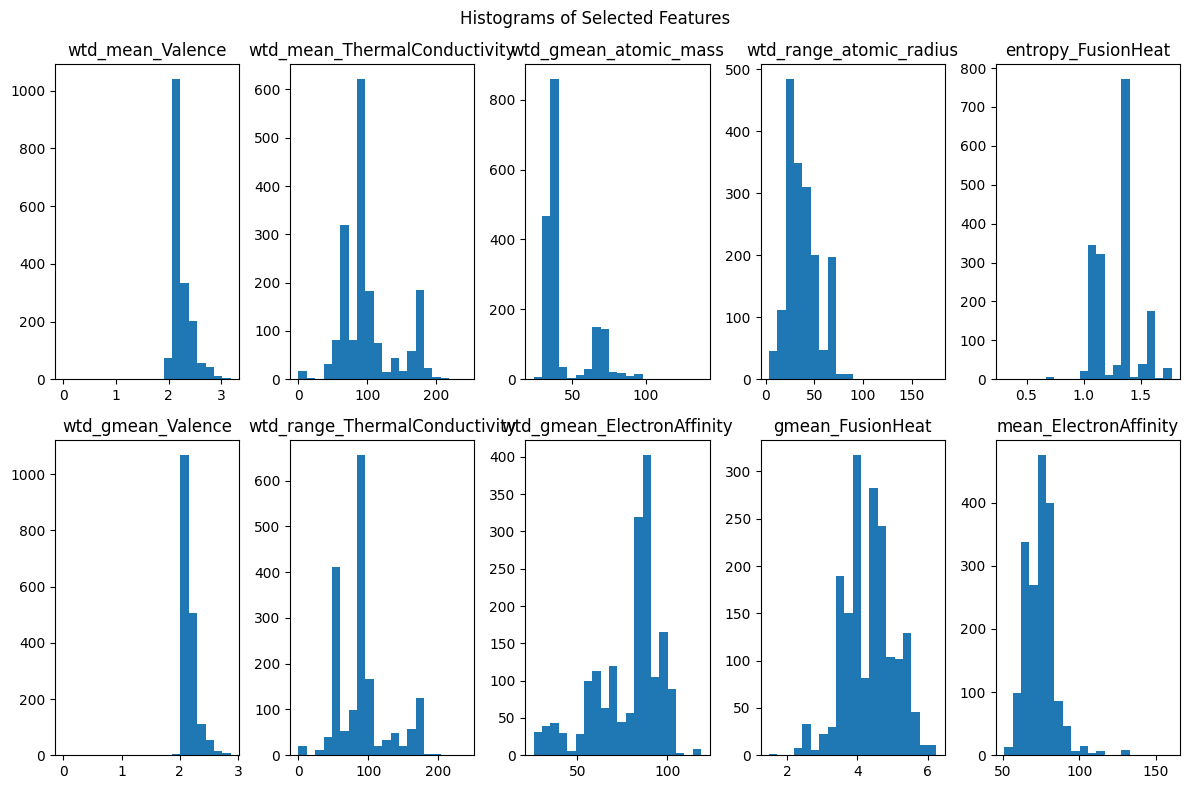

In [ ]:
import matplotlib.pyplot as plt

# Visualize the selected features as histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[:, i], bins=20)
    plt.title(feature)
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()


*D:Min-Max Scaling*

In [ ]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


*E:Splitting Data into Training and Testing Sets*

In [ ]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*F:Model Training (Support Vector Machine)*

In [ ]:
# Initialize and train the Support Vector Machine (SVM) model
from sklearn.svm import SVR

svm_model = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

*G:Model Evaluation and Visualization*

Mean Squared Error (MSE): 675.0580411517299
Root Mean Squared Error (RMSE): 25.981879092008143
R-squared (R2): 0.25%


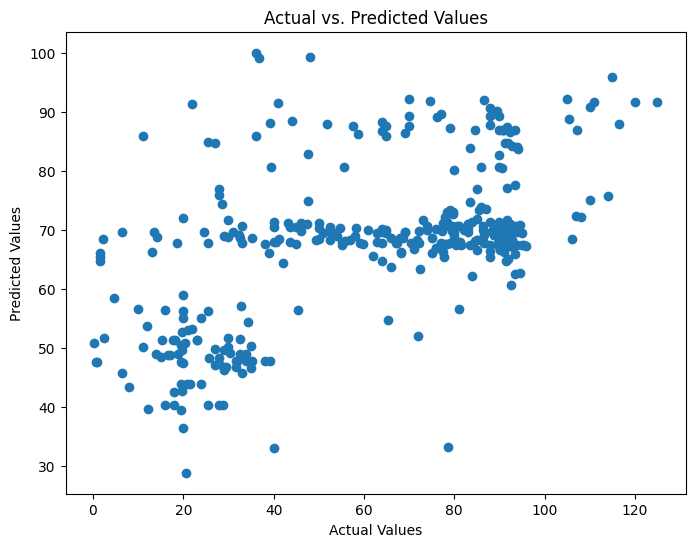

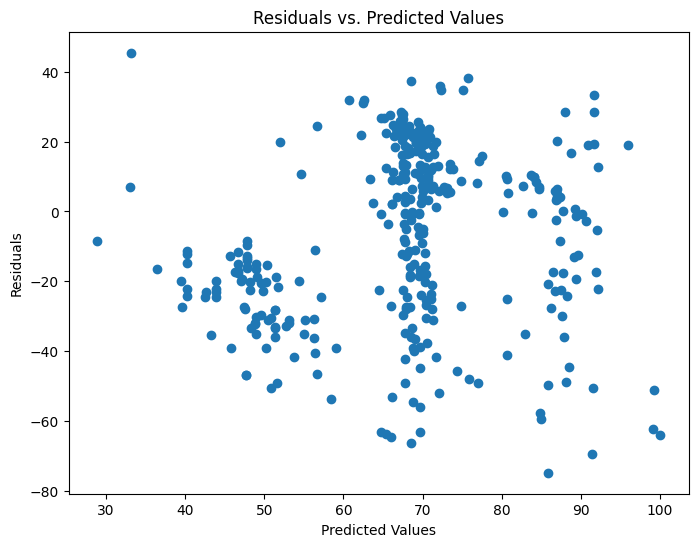

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


# **2.LINEAR REGRESSION**

*A.Data Loading and Feature Selection*

In [ ]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)


      number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                      4         88.944468             57.862692   
1                      5         92.729214             58.518416   
2                      4         88.944468             57.885242   
3                      4         88.944468             57.873967   
4                      4         88.944468             57.840143   
...                  ...               ...                   ...   
1761                   5         72.324650             51.174579   
1762                   5         72.324650             51.103493   
1763                   7         88.309607             77.690332   
1764                   7         88.309607             79.010075   
1765                   7         88.309607             80.329818   

      gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0             66.361592              36.116612             1.181795   
1             73.132787              36.3

*B.Data Preprocessing*

In [ ]:
  subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()



*C.Visualization of Selected Features*

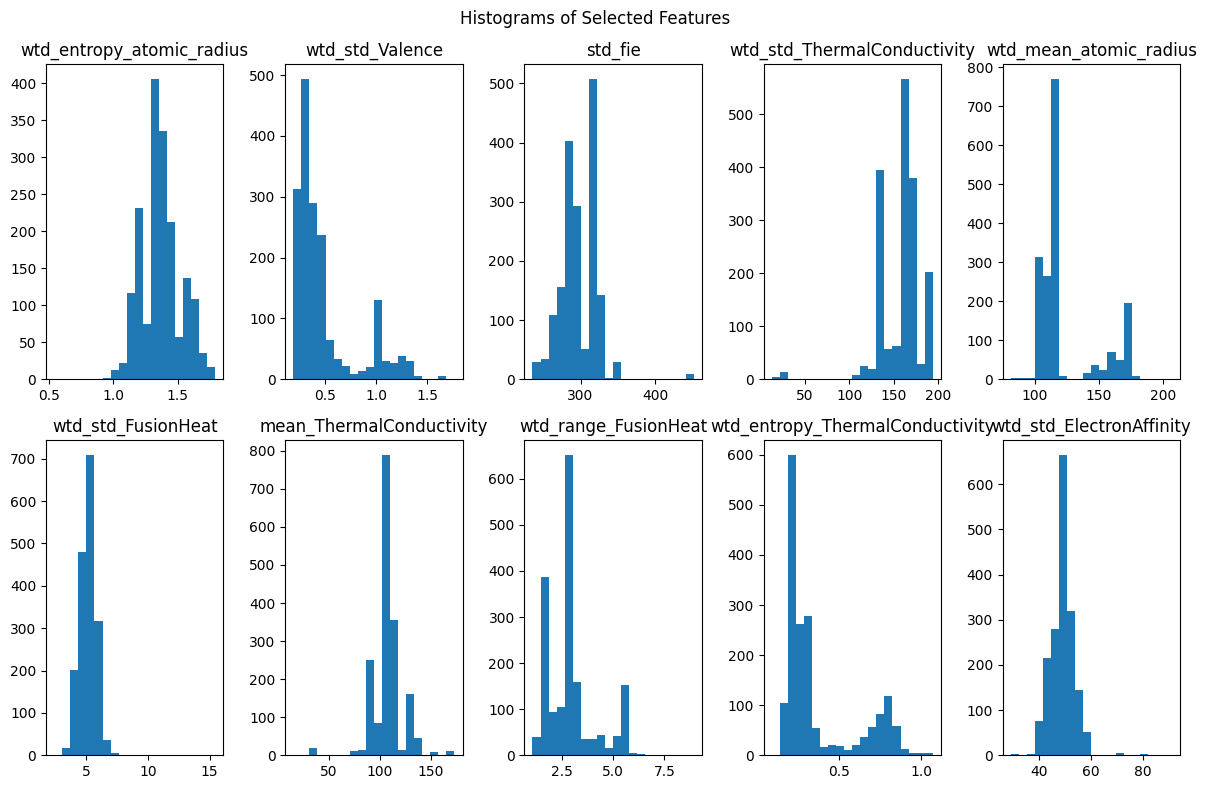

In [ ]:
import matplotlib.pyplot as plt

# Visualize the selected features as histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[:, i], bins=20)
    plt.title(feature)
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()


*D.Min-Max Scaling*

In [ ]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


*E.Data Splitting*

In [ ]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*F.Model Training (Linear Regression)*

In [ ]:
# Initialize and train the Linear Regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

*G.Model Evaluation and Metrics*

In [ ]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.2f}%")

Mean Squared Error (MSE): 514.8739747360893
Root Mean Squared Error (RMSE): 22.690834597609875
R-squared (R2): 0.43%


*H.Visualization of Results*

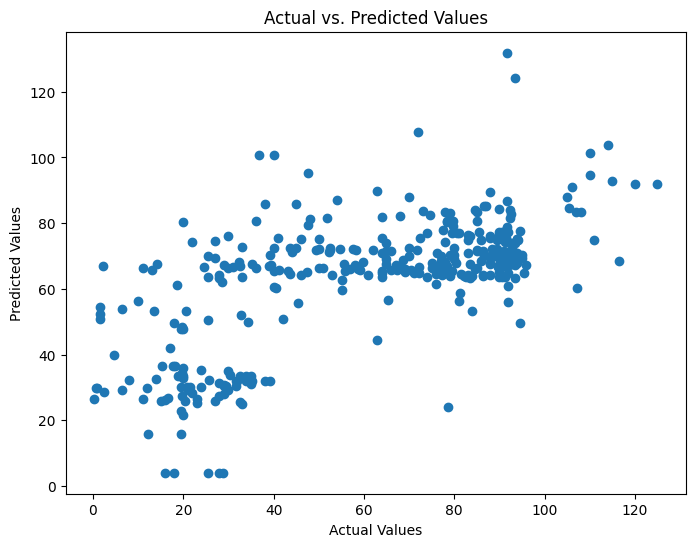

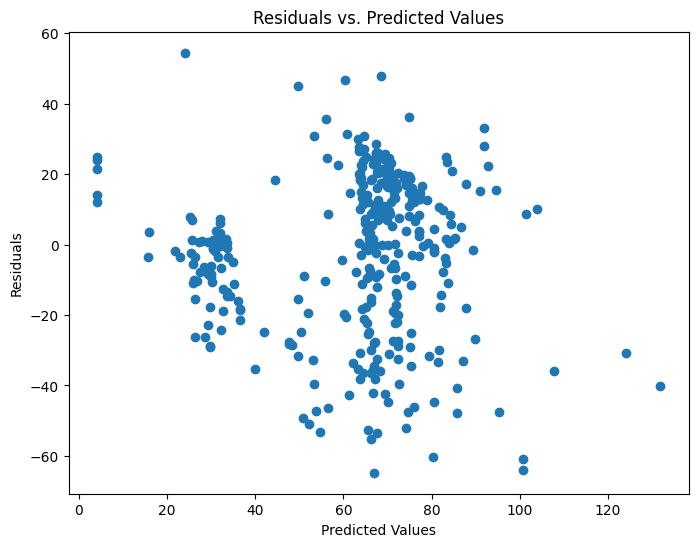

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


# ***3.RIDGE REGRESSION***

Selected Features: ['std_Valence', 'wtd_std_Density', 'wtd_entropy_atomic_mass', 'wtd_mean_atomic_radius', 'mean_ElectronAffinity', 'wtd_std_FusionHeat', 'mean_Valence', 'wtd_range_Density', 'gmean_Density', 'range_ThermalConductivity']
Ridge Regression without Bootstrap:
RMSE: 23.28
MSE: 542.08
R-squared: 0.40


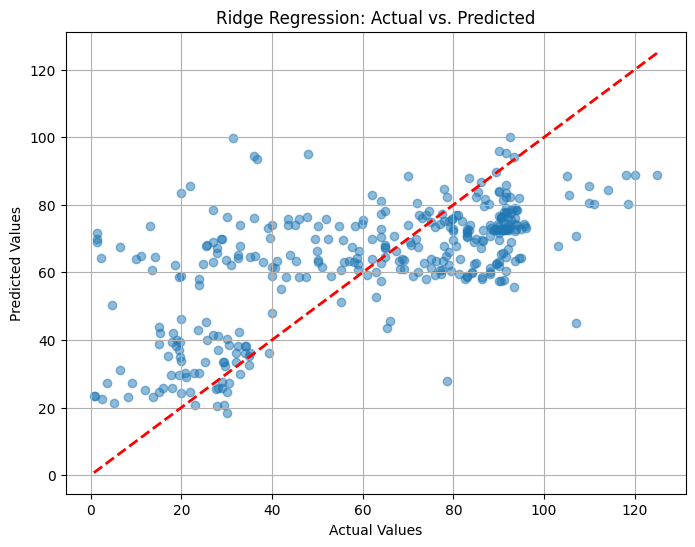

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Remove rows with missing values in both X and y
subset = subset.dropna(subset=selected_features + ['critical_temp'])
X = subset[selected_features]
y = subset['critical_temp']

# Impute missing values with the mean of each column for 'X'
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
ridge_model.fit(X_train, y_train)

ridge_y_pred = ridge_model.predict(X_test)

# Calculate MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, ridge_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_y_pred)

print("Ridge Regression without Bootstrap:")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Scatter plot with best fit line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs. Predicted")
plt.grid(True)

# Plot the best fit line
x_range = np.linspace(min(y_test), max(y_test), 100)
y_range = x_range
plt.plot(x_range, y_range, color='red', linestyle='--', linewidth=2)

plt.show()


# ***4.LASSO REGRESSION***

Selected Features: ['gmean_Density', 'std_Valence', 'entropy_ElectronAffinity', 'gmean_ElectronAffinity', 'std_Density', 'wtd_mean_ThermalConductivity', 'wtd_entropy_ElectronAffinity', 'wtd_mean_Density', 'wtd_entropy_FusionHeat', 'range_FusionHeat']
Lasso Regression:
RMSE: 28.25
MSE: 798.34
R-squared: 0.12


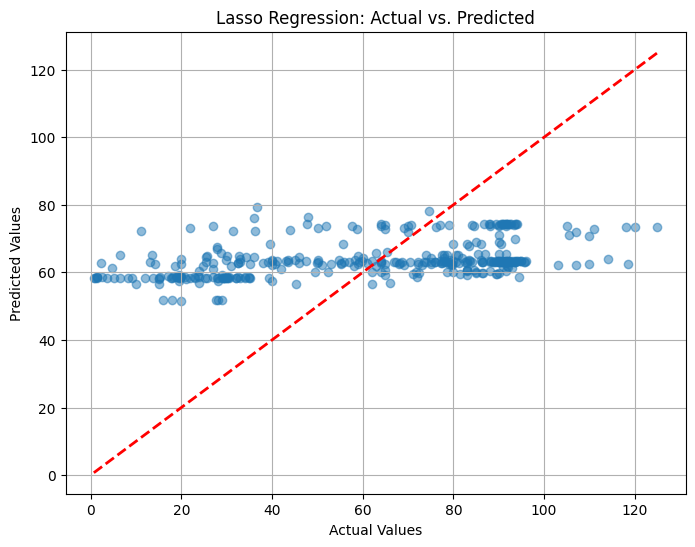

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Remove rows with missing values in both X and y
subset = subset.dropna(subset=selected_features + ['critical_temp'])
X = subset[selected_features]
y = subset['critical_temp']

# Impute missing values with the mean of each column for 'X'
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
lasso_model.fit(X_train, y_train)

lasso_y_pred = lasso_model.predict(X_test)

# Calculate MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, lasso_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_y_pred)

print("Lasso Regression:")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Scatter plot with best fit line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs. Predicted")
plt.grid(True)

# Plot the best fit line
x_range = np.linspace(min(y_test), max(y_test), 100)
y_range = x_range
plt.plot(x_range, y_range, color='red', linestyle='--', linewidth=2)

plt.show()


# ***5.k-Nearest Neighbors (KNN) regression***

Selected Features: ['mean_Valence', 'gmean_ThermalConductivity', 'mean_atomic_radius', 'mean_ElectronAffinity', 'wtd_std_ThermalConductivity', 'wtd_range_Density', 'gmean_FusionHeat', 'std_fie', 'wtd_mean_FusionHeat', 'wtd_mean_atomic_radius']
KNN Regression:
RMSE: 14.18
MSE: 201.14
R-squared: 0.78


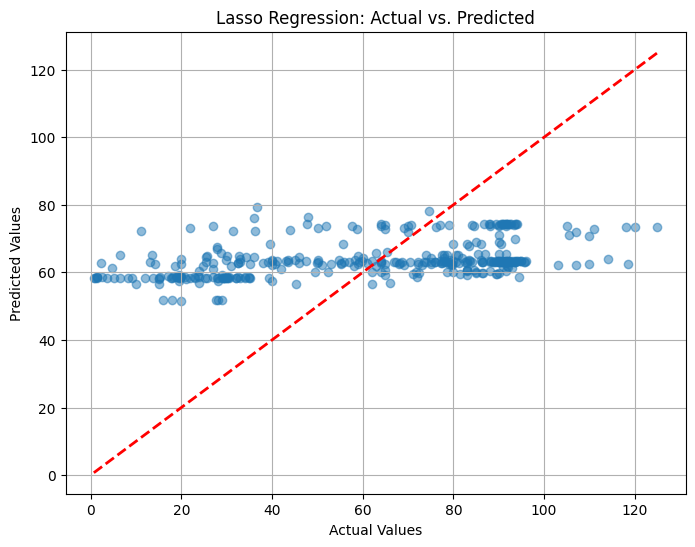

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Remove rows with missing values in both X and y
subset = subset.dropna(subset=selected_features + ['critical_temp'])
X = subset[selected_features]
y = subset['critical_temp']

# Impute missing values with the mean of each column for 'X'
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_test)

# Calculate MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, knn_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_y_pred)

print("KNN Regression:")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
# Scatter plot with best fit line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs. Predicted")
plt.grid(True)

# Plot the best fit line
x_range = np.linspace(min(y_test), max(y_test), 100)
y_range = x_range
plt.plot(x_range, y_range, color='red', linestyle='--', linewidth=2)

plt.show()


# ***6.1.SVM WITH BOOTSTRAP METHOD***

Selected Features: ['gmean_FusionHeat', 'wtd_std_atomic_radius', 'range_FusionHeat', 'std_atomic_mass', 'mean_atomic_mass', 'wtd_entropy_ThermalConductivity', 'wtd_std_FusionHeat', 'gmean_fie', 'wtd_gmean_fie', 'wtd_mean_Density']


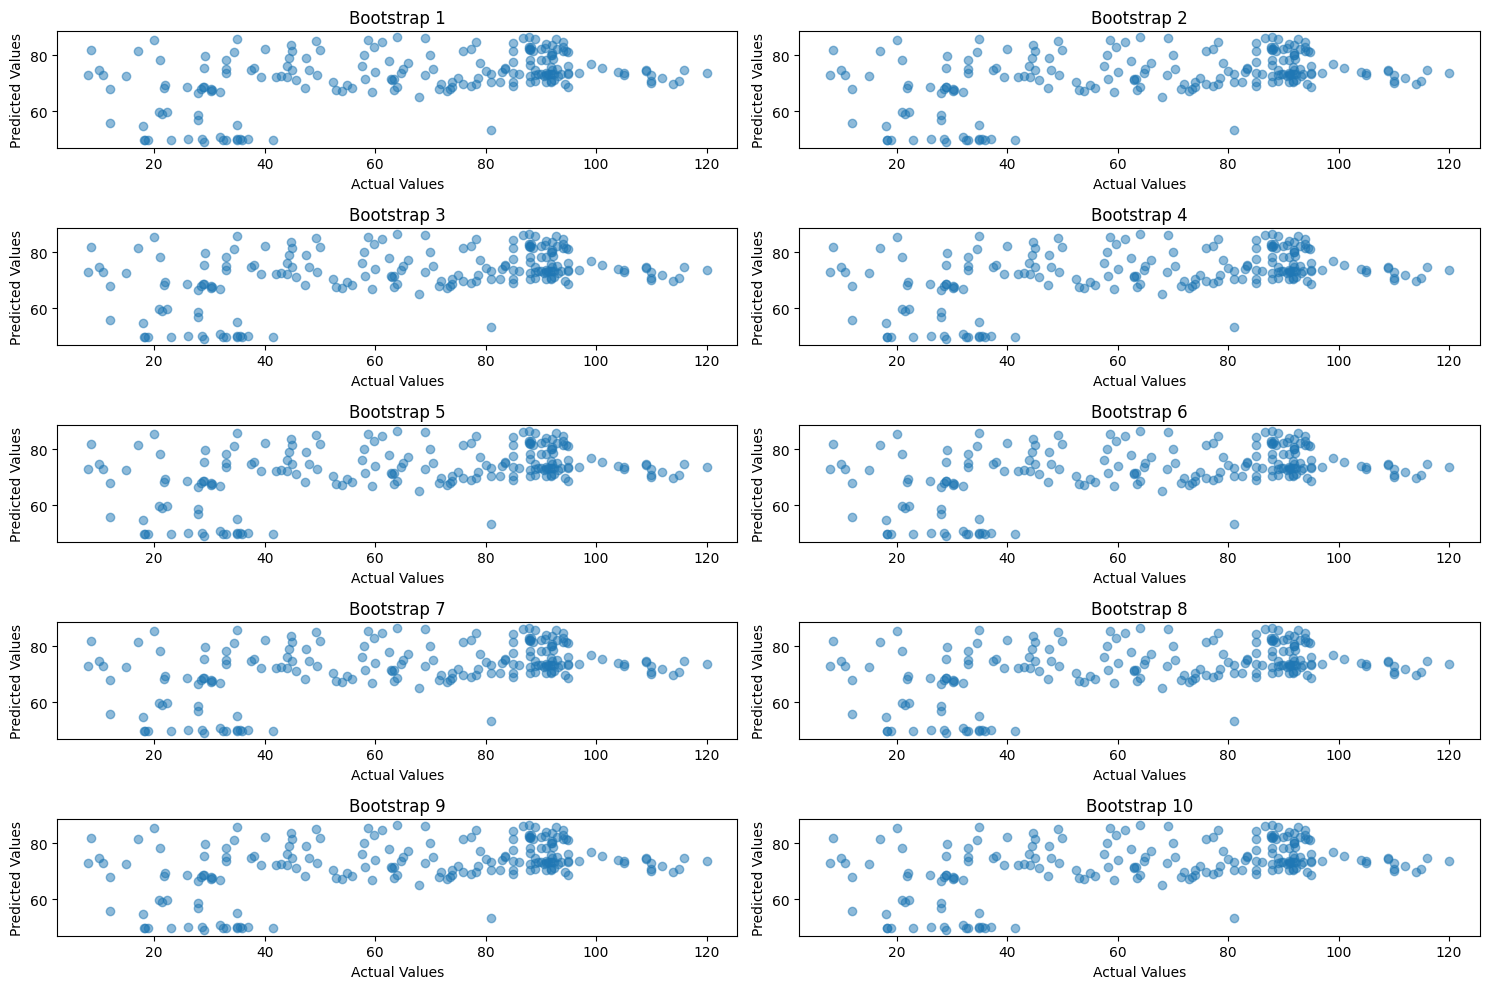

SVM with Bootstrap:
Mean RMSE across bootstraps: 27.13
Standard Error of RMSE: 0.00
Mean MSE across bootstraps: 736.14
Mean R-squared across bootstraps: 0.12


In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:1000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM with Bootstrap
n_bootstraps = 10  # Number of bootstraps
svm_rmse_list = []
svm_mse_list = []
svm_r2_list = []

# Create a scatter plot for each bootstrap
plt.figure(figsize=(15, 10))
for i in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust SVM parameters as needed
    svm_model.fit(X_resampled, y_resampled)

    svm_y_pred = svm_model.predict(X_test)

    svm_mse = mean_squared_error(y_test, svm_y_pred)
    svm_rmse = np.sqrt(svm_mse)
    svm_r2 = r2_score(y_test, svm_y_pred)

    svm_mse_list.append(svm_mse)
    svm_rmse_list.append(svm_rmse)
    svm_r2_list.append(svm_r2)

    # Scatter plot for the current bootstrap
    plt.subplot(5, 2, i+1)
    plt.scatter(y_test, svm_y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f'Bootstrap {i + 1}')

# Create histograms for RMSE and R-squared
plt.tight_layout()
plt.show()

mean_svm_rmse = np.mean(svm_rmse_list)
std_svm_rmse = np.std(svm_rmse_list)
mean_svm_mse = np.mean(svm_mse_list)
mean_svm_r2 = np.mean(svm_r2_list)

print("SVM with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_svm_rmse:.2f}")
print(f"Standard Error of RMSE: {std_svm_rmse:.2f}")
print(f"Mean MSE across bootstraps: {mean_svm_mse:.2f}")
print(f"Mean R-squared across bootstraps: {mean_svm_r2:.2f}")


# ***7.LINEAR REGRESSION WITH BOOTSTRAP***

Selected Features: ['std_FusionHeat', 'entropy_ElectronAffinity', 'wtd_mean_atomic_radius', 'entropy_Density', 'entropy_ThermalConductivity', 'gmean_ThermalConductivity', 'wtd_range_ThermalConductivity', 'gmean_Valence', 'wtd_std_FusionHeat', 'range_atomic_mass']
Linear Regression with Bootstrap:
Mean RMSE across bootstraps: 24.29
Standard Error of RMSE: 0.00
Mean MSE across bootstraps: 590.11
Mean R-squared across bootstraps: 0.35


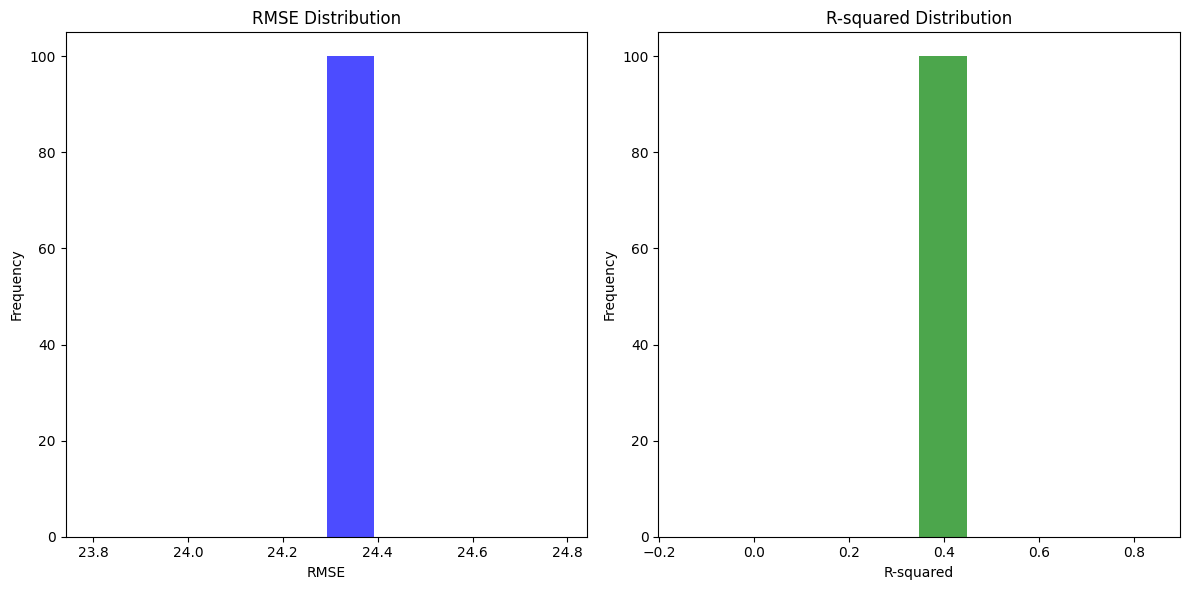

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps
lr_rmse_list = []
lr_mse_list = []
lr_r2_list = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(X_resampled, y_resampled)

    lr_y_pred = lr_model.predict(X_test)

    lr_mse = mean_squared_error(y_test, lr_y_pred)
    lr_rmse = np.sqrt(lr_mse)
    lr_r2 = r2_score(y_test, lr_y_pred)

    lr_mse_list.append(lr_mse)
    lr_rmse_list.append(lr_rmse)
    lr_r2_list.append(lr_r2)

mean_lr_rmse = np.mean(lr_rmse_list)
std_lr_rmse = np.std(lr_rmse_list)
mean_lr_mse = np.mean(lr_mse_list)
mean_lr_r2 = np.mean(lr_r2_list)

print("Linear Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_lr_rmse:.2f}")
print(f"Standard Error of RMSE: {std_lr_rmse:.2f}")
print(f"Mean MSE across bootstraps: {mean_lr_mse:.2f}")
print(f"Mean R-squared across bootstraps: {mean_lr_r2:.2f}")

# Create histograms for RMSE and R-squared
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(lr_rmse_list, bins=10, color='blue', alpha=0.7)
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distribution')

plt.subplot(1, 2, 2)
plt.hist(lr_r2_list, bins=10, color='green', alpha=0.7)
plt.xlabel('R-squared')
plt.ylabel('Frequency')
plt.title('R-squared Distribution')

plt.tight_layout()
plt.show()


# ***8.RIDGE REGRESSION WITH BOOTSTRAP***

Selected Features: ['mean_FusionHeat', 'entropy_ThermalConductivity', 'wtd_entropy_fie', 'gmean_fie', 'entropy_atomic_radius', 'std_fie', 'wtd_gmean_Valence', 'gmean_atomic_mass', 'wtd_mean_atomic_radius', 'wtd_range_fie']
Ridge Regression with Bootstrap:
Mean RMSE across bootstraps: 24.24
Standard Error of RMSE: 0.00
Mean R-squared across bootstraps: 0.35


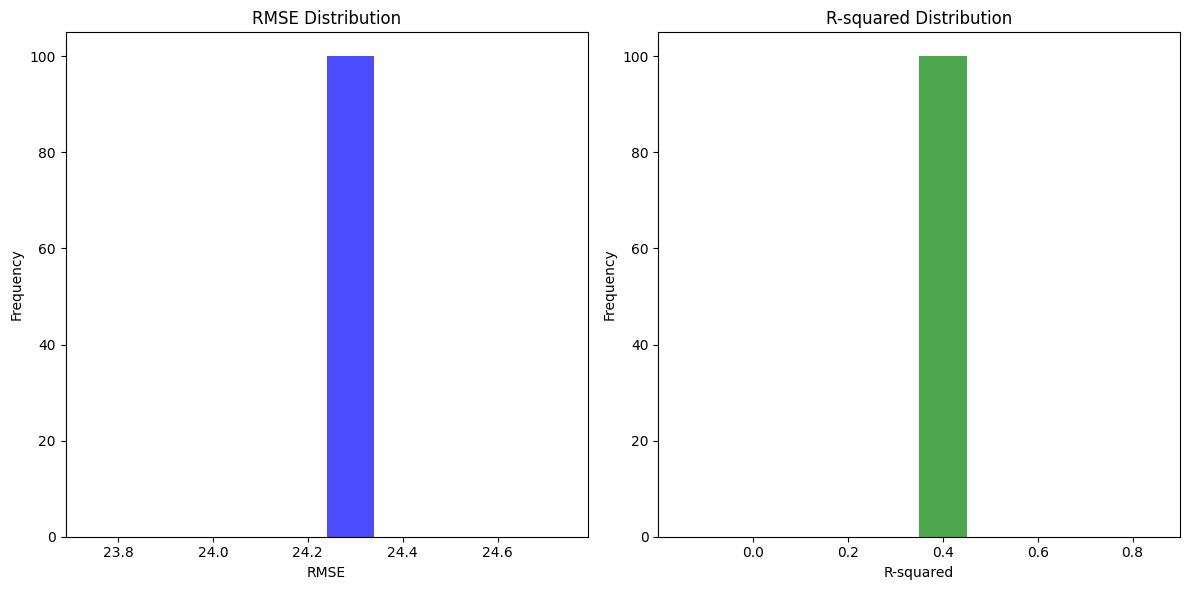

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps
ridge_rmse_list = []
ridge_mse_list = []
ridge_r2_list = []

# Create histograms for RMSE and R-squared
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
    ridge_model.fit(X_resampled, y_resampled)

    ridge_y_pred = ridge_model.predict(X_test)

    ridge_mse = mean_squared_error(y_test, ridge_y_pred)
    ridge_rmse = np.sqrt(ridge_mse)
    ridge_rmse_list.append(ridge_rmse)

plt.hist(ridge_rmse_list, bins=10, color='blue', alpha=0.7)
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distribution')

plt.subplot(1, 2, 2)
for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
    ridge_model.fit(X_resampled, y_resampled)

    ridge_y_pred = ridge_model.predict(X_test)

    ridge_r2 = r2_score(y_test, ridge_y_pred)
    ridge_r2_list.append(ridge_r2)

plt.hist(ridge_r2_list, bins=10, color='green', alpha=0.7)
plt.xlabel('R-squared')
plt.ylabel('Frequency')
plt.title('R-squared Distribution')

plt.tight_layout()

mean_ridge_rmse = np.mean(ridge_rmse_list)
std_ridge_rmse = np.std(ridge_rmse_list)
mean_ridge_r2 = np.mean(ridge_r2_list)

print("Ridge Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_ridge_rmse:.2f}")
print(f"Standard Error of RMSE: {std_ridge_rmse:.2f}")
print(f"Mean R-squared across bootstraps: {mean_ridge_r2:.2f}")

plt.show()


# ***9.LASSO REGRESSION WITH BOOTSTRAP***

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps
lasso_rmse_list = []
lasso_mse_list = []
lasso_r2_list = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
    lasso_model.fit(X_resampled, y_resampled)

    lasso_y_pred = lasso_model.predict(X_test)

    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    lasso_rmse = np.sqrt(lasso_mse)
    lasso_r2 = r2_score(y_test, lasso_y_pred)

    lasso_mse_list.append(lasso_mse)
    lasso_rmse_list.append(lasso_rmse)
    lasso_r2_list.append(lasso_r2)

mean_lasso_rmse = np.mean(lasso_rmse_list)
std_lasso_rmse = np.std(lasso_rmse_list)
mean_lasso_mse = np.mean(lasso_mse_list)
mean_lasso_r2 = np.mean(lasso_r2_list)

print("Lasso Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_lasso_rmse:.2f}")
print(f"Standard Error of RMSE: {std_lasso_rmse:.2f}")
print(f"Mean MSE across bootstraps: {mean_lasso_mse:.2f}")
print(f"Mean R-squared across bootstraps: {mean_lasso_r2:.2f}")

Selected Features: ['gmean_ThermalConductivity', 'number_of_elements', 'wtd_gmean_ThermalConductivity', 'wtd_range_atomic_mass', 'wtd_std_Valence', 'wtd_gmean_FusionHeat', 'wtd_entropy_ElectronAffinity', 'std_ElectronAffinity', 'range_atomic_mass', 'wtd_range_ElectronAffinity']
Lasso Regression with Bootstrap:
Mean RMSE across bootstraps: 29.75
Standard Error of RMSE: 0.00
Mean MSE across bootstraps: 885.12
Mean R-squared across bootstraps: 0.02


# ***10.k-Nearest Neighbors (KNN) regression with Bootstrap***

Selected Features: ['wtd_range_FusionHeat', 'range_Density', 'std_ElectronAffinity', 'wtd_range_atomic_radius', 'range_atomic_radius', 'wtd_entropy_ThermalConductivity', 'wtd_entropy_Valence', 'wtd_mean_fie', 'wtd_range_Valence', 'wtd_range_ElectronAffinity']
KNN Regression with Bootstrap:
Mean RMSE across bootstraps: 16.76
Standard Error of RMSE: 0.00
Mean MSE across bootstraps: 280.99117824496
Mean R-squared across bootstraps: 0.71


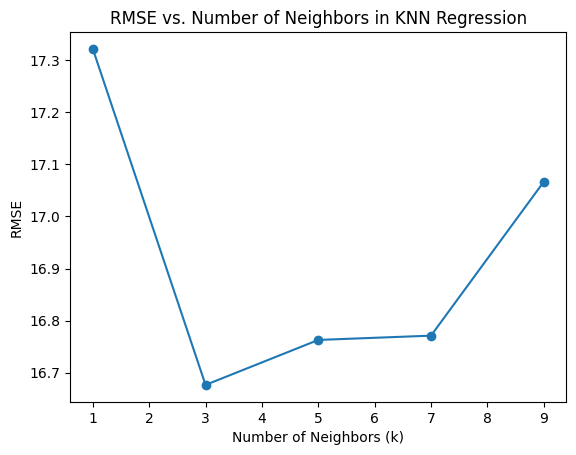

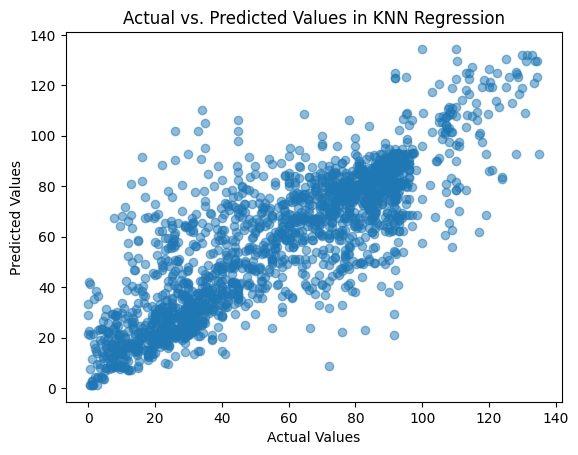

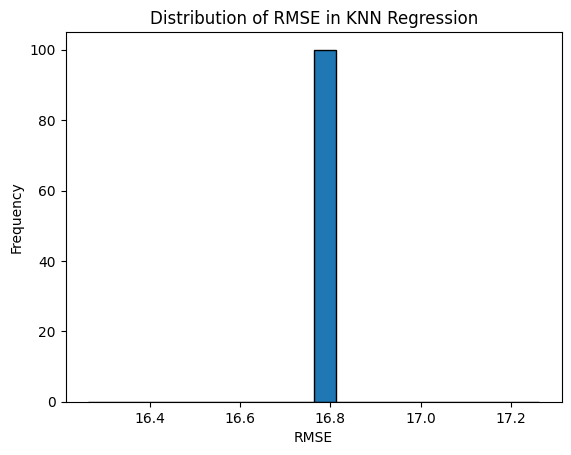

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps
knn_rmse_list = []
knn_mse_list = []
knn_r2_list = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
    knn_model.fit(X_resampled, y_resampled)

    knn_y_pred = knn_model.predict(X_test)

    knn_mse = mean_squared_error(y_test, knn_y_pred)
    knn_rmse = np.sqrt(knn_mse)
    knn_r2 = r2_score(y_test, knn_y_pred)

    knn_mse_list.append(knn_mse)
    knn_rmse_list.append(knn_rmse)
    knn_r2_list.append(knn_r2)

mean_knn_rmse = np.mean(knn_rmse_list)
std_knn_rmse = np.std(knn_rmse_list)
mean_knn_mse = np.mean(knn_mse_list)
mean_knn_r2 = np.mean(knn_r2_list)

print("KNN Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_knn_rmse:.2f}")
print(f"Standard Error of RMSE: {std_knn_rmse:.2f}")
print(f"Mean MSE across bootstraps: {mean_knn_mse:}")
print(f"Mean R-squared across bootstraps: {mean_knn_r2:.2f}")
k_values = [1, 3, 5, 7, 9]  # Adjust as needed
rmse_values = []  # Store RMSE values for each k

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_resampled, y_resampled)
    knn_y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, knn_y_pred))
    rmse_values.append(rmse)

plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Neighbors in KNN Regression')
plt.show()
plt.scatter(y_test, knn_y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in KNN Regression')
plt.show()
plt.hist(knn_rmse_list, bins=20, edgecolor='k')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('Distribution of RMSE in KNN Regression')
plt.show()



